# Lab 2

In this lab exercise, you will look at applying different noise removal filters and investigate the effect on edge detection.

**You are asked to write a short (no more than 2 pages) report of your work**, answering specific questions, and showing example images. This work is not assessed (it will not count toward your module mark) but you will get formative feedback

In [1]:
# Imports
import skimage
import scipy
import scipy.signal
import time
from matplotlib import pyplot as plt
import numpy as np
import filters
from filters import gaussian_filter_3x3, gaussian_filter_5x5 
from utils import show_rgb_image, show_binary_image, sample_gaussian, zero_cross

import matplotlib as mpl
mpl.rcParams['figure.dpi'] =  130
import time

### Task 1: Filter Size Effect

Load the shakey image using the ```skimage.io.imread``` function

Using the built-in procedure ```scipy.signal.convolve2D``` convolve the image with the 3x3 Gaussian filter, and then the 5x5 filter. 

- Can you see any difference between them?
- Try applying an edge filter to each and thresholding. Refer to the previous assignment to understand the convolve2d function.

**QUESTION 1: Can you describe the effect in comparison with applying the edge filter to the image directly?**

- By applying the filter, we cannot distinguish any remarkable change between both results. However, once we apply an edge detector the differences are evident. 
- The 5x5 Gaussian filter reduces in a higher degree the noise on the image than the 3x3 Gaussian filter, making it easier to distinguish between noise and actual edges. 

**Reasons**:

- This is because the 5x5 Gaussian filter has a bigger receptive field, covering more pixels during the convolution and consequently aplying a weighted average over more values. 
- The effect of the 3x3 Gaussian filter is similar but with less strength because it covers less pixels.

In [2]:
# Negatives to zero
def truncate_negative(matrix):
    matrix[matrix < 0] = 0
    return matrix

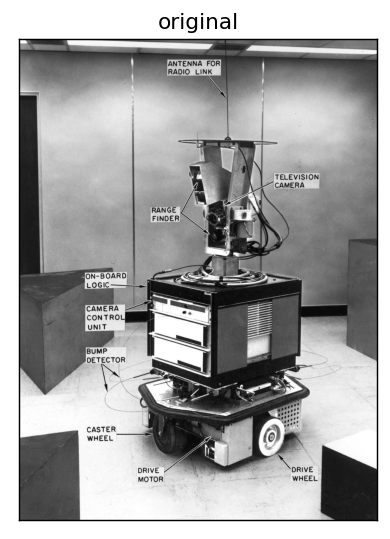

In [3]:
# Complete Task 1 here

# Read image
shakey = skimage.io.imread('shakey.jpg')[:,:,0] #Extract the Green Channel

show_binary_image(shakey, "original")

def apply_filter(image, kernel, threshold = None):
    if threshold:
        # We can also threshold the image using the > operator
        filter_image = abs(scipy.signal.convolve2d(image, kernel))>threshold
    else:
        filter_image = abs(scipy.signal.convolve2d(image, kernel))

    return filter_image


# NOTE: you don't have to combine the kernel. You need to combine the result
def apply_magnitude(image, x,y, threshold = None):

    Gx = apply_filter(image, x, threshold)
    Gy = apply_filter(image, y, threshold)

    return np.sqrt(Gx**2 + Gy**2)

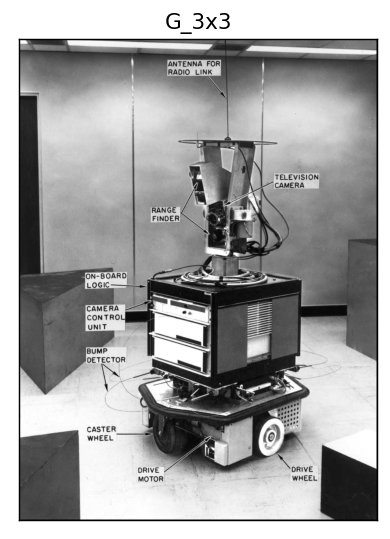

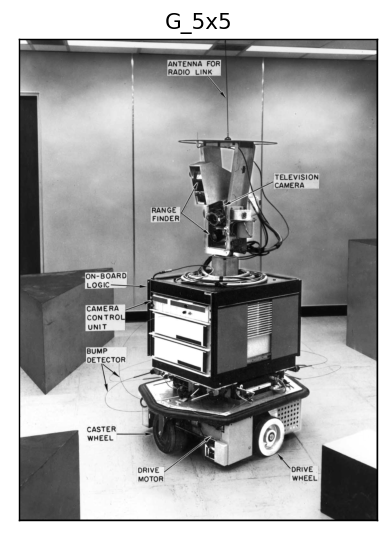

In [4]:
filter_image = apply_filter(shakey, filters.gaussian_filter_3x3)
show_binary_image(filter_image, "G_3x3")

filter_image = apply_filter(shakey, filters.gaussian_filter_3x3)
show_binary_image(filter_image, "G_5x5")


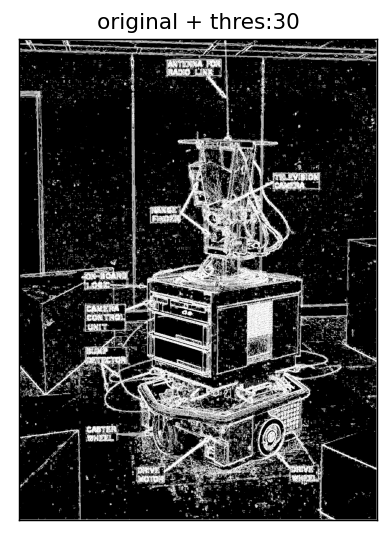

In [5]:
# Applying edge detectors
# Original Image
threshold = 30
filter_image = apply_magnitude(shakey, filters.sobel_x, filters.sobel_y, threshold)
show_binary_image(filter_image, f"original + thres:{threshold}")

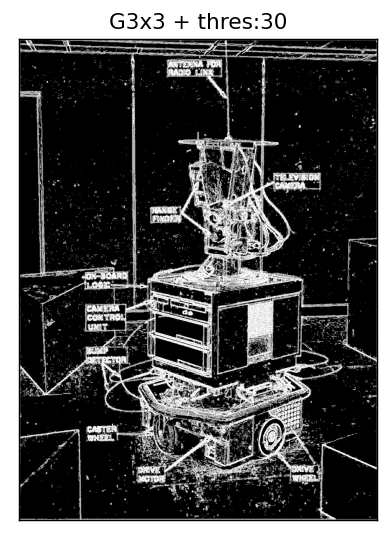

In [6]:
# Applying edge detectors
# Gaussian + Edge Detector
threshold = 30
filter_image = apply_filter(shakey, filters.gaussian_filter_3x3)
filter_image = apply_magnitude(filter_image, filters.sobel_x, filters.sobel_y, threshold)
show_binary_image(filter_image,  f"G3x3 + thres:{threshold}")

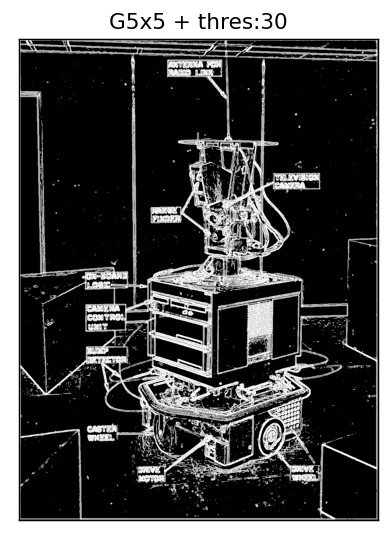

In [7]:
# Applying edge detectors
# Gaussian + Edge Detector
threshold = 30
filter_image = apply_filter(shakey, filters.gaussian_filter_5x5)
filter_image = apply_magnitude(filter_image, filters.sobel_x, filters.sobel_y, threshold)
show_binary_image(filter_image,  f"G5x5 + thres:{threshold}")

In [8]:
def apply_G_plus_sobel(image, noise_kernel, threshold = 30):
    filter_image = apply_filter(image, noise_kernel)
    filter_image = apply_magnitude(filter_image, filters.sobel_x, filters.sobel_y, threshold)

    return filter_image

Applying the gaussian filter results in a smoother image. When the original edge image image is compared to the gaussian filtered edge image, there is far less noise in the gaussian filtered edge image.

### Task 2: Gaussian Std Effect

Using the function ```sample_gaussian(std_dev,mean,vec)``` you can create a discrete sample from a Gaussian (Normal) density. You need to specify the mean(keep it at 0, think about why) and the standard deviation **std_dev**. You should also specify an input vector in the form of ```np.arange(min=-x,max=x+1,step=1,dtype=np.float32)``` which will produce a sample of size 2x+1.

So you can create larger and smaller vectors by altering the step size or the limits of the vector (the min and max values). 

Now try creating a 9x9 Gaussian mask. To do this you will need to use matrix multiplication in the right way. 

1. Try some initial exploratory experiments with this, what happens to the image as you increase the size of the mask?
2. What happens as you increase the size of **std_dev**? Make detailed notes as you proceed about what you did and what you observed.
3. Now apply gradient operators such as the Sobel operators to the blurred images. What happens to the edges in the heavily blurred case?

**Question 2: What  is  the  effect  of  increasing  the  size  of  the  Gaussian  Filter  (3x3  versus  5x5  for  example)?** 
**What is the effect of changing the standard deviation s? Why do you see what you see?**

**Questions for me**

1. Why mean cannot be 0? Because I'm interesting in focusing the average in the center pixel.
2. Is this sample random or not?

In [9]:

# Complete Task 2 here
# Discrete Sample from a gaussian normal density function
# NOTE: This sample is not random, right????
# Sample size: size 2x+1

def create2DFilter(std_dev = 1, mean = 0, x = 4):
    vec = np.arange(-x,x+1,step=1,dtype=np.float32)
    one_D_filter = sample_gaussian(std_dev,mean,vec = vec )

    # Creating 9x9 G mask matrix
    two_D_filter = one_D_filter.T @ one_D_filter

    return two_D_filter


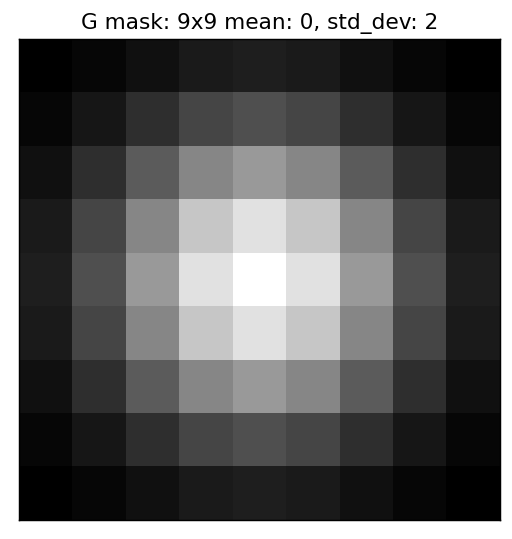

In [10]:
# total size 2x + 1
x = 4
std_dev = 2
mean = 0
G_filter = create2DFilter(std_dev, mean, x = x)
show_binary_image(G_filter, f"G mask: {2*x+1}x{2*x+1} mean: {mean}, std_dev: {std_dev}")

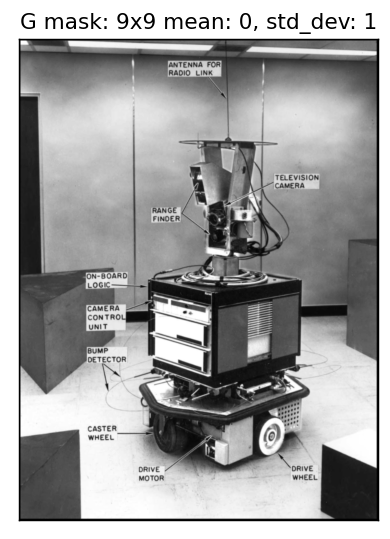

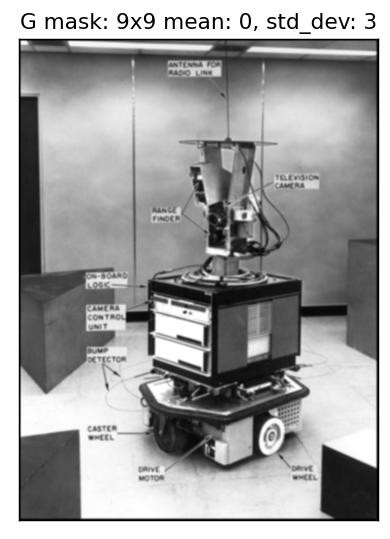

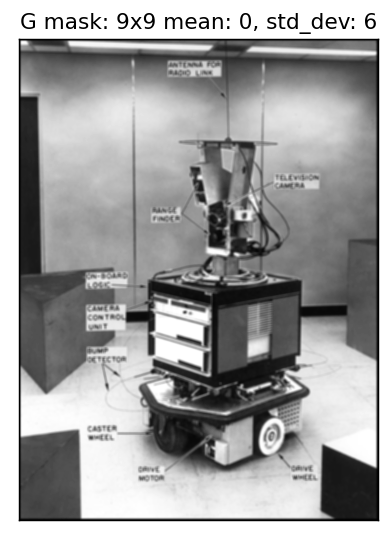

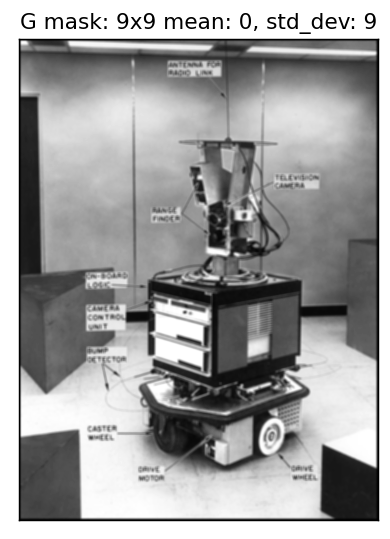

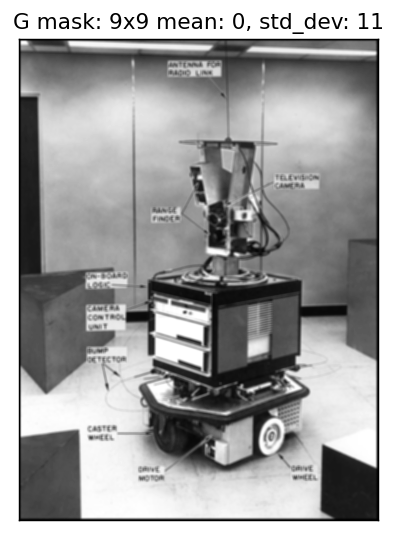

In [11]:
# What happen if I change the standard deviation => more blur
x = 4
# std_dev = 1
mean = 0

std_devs = [1, 3, 6, 9, 11]

for std_dev in std_devs:
    G_filter = create2DFilter(std_dev, mean, x = x)
    filter_image = apply_filter(shakey, G_filter)
    show_binary_image(filter_image, f"G mask: {2*x+1}x{2*x+1} mean: {mean}, std_dev: {std_dev}")

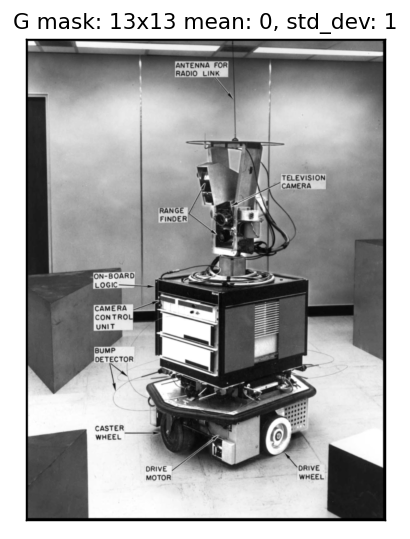

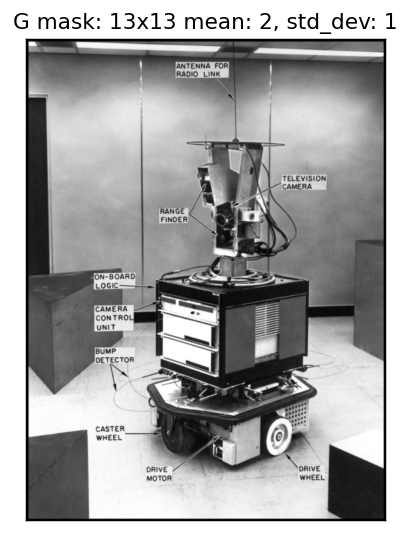

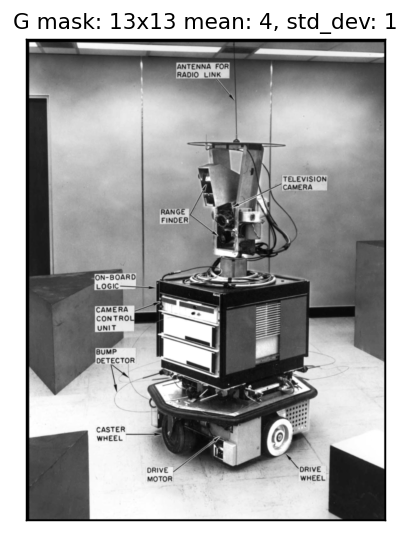

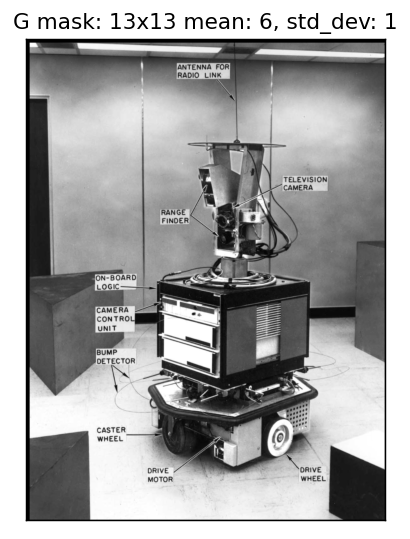

In [12]:
# What happen if I change the mean? => Evidently your are focusing in other pixel not the center
# The effect is that the image shift a little bit
x = 6
std_dev = 1
# mean = 0

means = [0, 2, 4, 6]

for mean in means:
    G_filter = create2DFilter(std_dev, mean, x = x)
    filter_image = apply_filter(shakey, G_filter)
    show_binary_image(filter_image, f"G mask: {2*x+1}x{2*x+1} mean: {mean}, std_dev: {std_dev}")

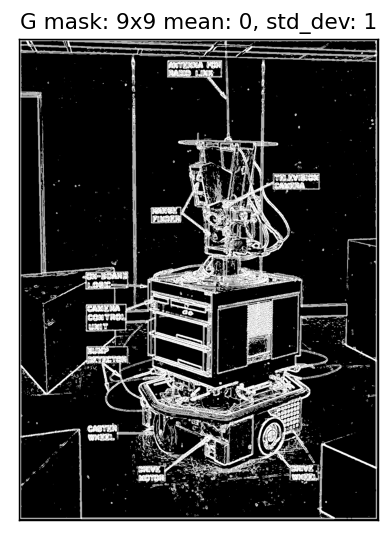

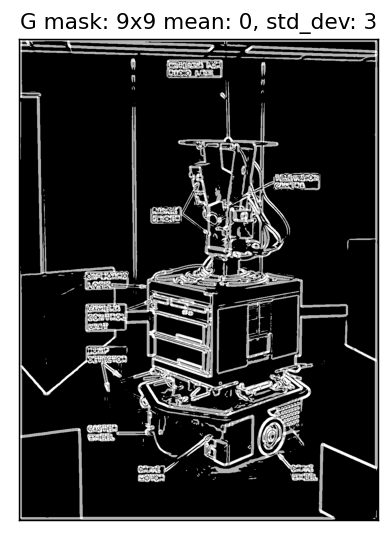

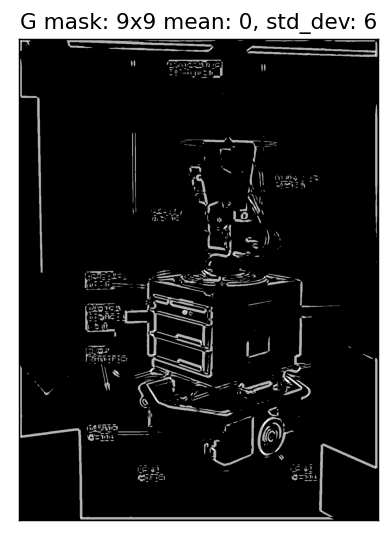

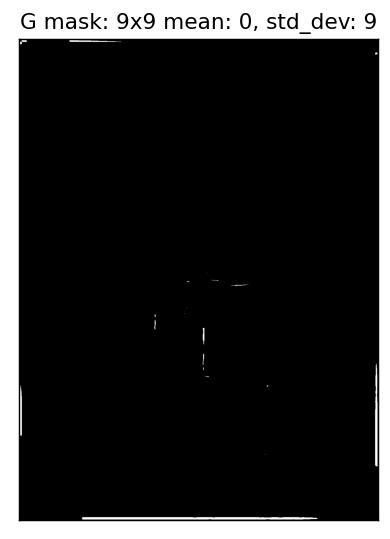

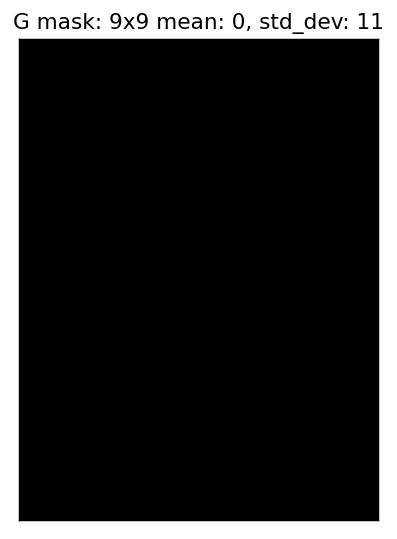

In [13]:
# What happen if I change the std and apply the sobel filter?
x = 4
# std_dev = 1
mean = 0

std_devs = [1, 3, 6, 9, 11]

for std_dev in std_devs:
    G_filter = create2DFilter(std_dev, mean, x = x)
    filter_image = apply_G_plus_sobel(shakey, G_filter, threshold = 30)
    show_binary_image(filter_image, f"G mask: {2*x+1}x{2*x+1} mean: {mean}, std_dev: {std_dev}")

Increasing the standard deviation shifts the weighting of the convolution away from the centre pixel and gives increased weighting to the pixels furtuer out. This results in the image appearing increasingly blurred. 

### Task 3: Two 1D filters vs One 2D Filter

Now compare the speed of applying two large 1D Gaussian filters in sequence, with applying a single equivalent 2D Gaussian filter that results from their multiplication. To test the CPU time used you can use a function called [time.monotonic()](https://docs.python.org/3/library/time.html#time.monotonic) . 

- Can you detect differences in the CPU times as the G mask sizes  increase? 
- You should check that the results are the same by examining areas of the image matrix in detail. 
- Are there any effects due to small floating point errors? 

In [14]:
# Complete Task 3 here
def one_and_two_G_filters(std_dev = 1, mean = 0, x = 4):
    vec = np.arange(-x,x+1,step=1,dtype=np.float32)
    one_D_filter = sample_gaussian(std_dev,mean,vec = vec )

    # Creating 9x9 G mask matrix
    two_D_filter = one_D_filter.T @ one_D_filter

    return one_D_filter, two_D_filter

x_sizes = [2, 3, 4, 5, 6, 7]

oneD_filters = []
twoD_filters = []

for x in x_sizes:
    oneD, twoD = one_and_two_G_filters(std_dev = 1, mean = 0, x = x)
    oneD_filters.append(oneD)
    twoD_filters.append(twoD)


In [15]:
for oneD, twoD, x  in zip(oneD_filters,twoD_filters, x_sizes):

    # Start the timer
    start_time = time.monotonic()

    # Perform the operation (e.g., setting values less than 0 to 0)
    result = apply_filter(shakey, oneD.T)
    result = apply_filter(shakey, oneD)

    # End the timer
    end_time = time.monotonic()

    # Calculate the time taken for the operation
    elapsed_time = end_time - start_time

    print(f"Elapsed time with 1D size {2*x+1}:", elapsed_time, end='\t')

    # Start the timer
    start_time = time.monotonic()

    # Perform the operation (e.g., setting values less than 0 to 0)
    result = apply_filter(shakey, twoD)

    # End the timer
    end_time = time.monotonic()

    # Calculate the time taken for the operation
    elapsed_time = end_time - start_time

    print(f"Elapsed time with 2D size {2*x+1}:", elapsed_time)


Elapsed time with 1D size 5: 0.08521144799999547	Elapsed time with 2D size 5: 0.0657350999999835
Elapsed time with 1D size 7: 0.05737099500004206	Elapsed time with 2D size 7: 0.10028356899999835
Elapsed time with 1D size 9: 0.07167117799997413	Elapsed time with 2D size 9: 0.1524126529999421
Elapsed time with 1D size 11: 0.08232479200000853	Elapsed time with 2D size 11: 0.21909679999998843
Elapsed time with 1D size 13: 0.09149420699998245	Elapsed time with 2D size 13: 0.29404766799996196
Elapsed time with 1D size 15: 0.10151977700002135	Elapsed time with 2D size 15: 0.3806001789999982


The execution time of applying a 2D convolution is far greater than that of applying two 1D filters. These differences increase as the size of the filter increases. When we compare the number of pixels which are the same we notice that only 7% of pixels are unchanged. However, visually the differences are very hard to distinguish. 

### Task 4: Laplacian and Noise Images

- Look at your Lecture notes and produce a 2D Laplacian filter. 

- Now try applying the Laplacian operator to the Shakey image. You will need to calculate the zero-crossing for edges: you can use the provided zero_corss function, where I_in is the image convolved with the Laplacian, and I_out is the calculated edges. 

- Think about the result. Why does it produce a poor result compared to the other operators?

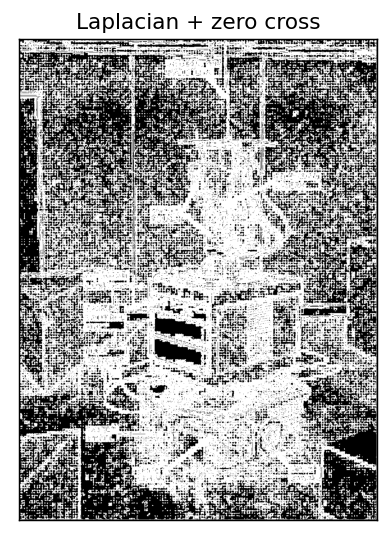

In [16]:
# Complete Task 4 here

laplacian_kernel = np.array([
    [0,  1, 0],
    [1, -4, 1],
    [0,  1, 0]
])

filter_image = scipy.signal.convolve2d(shakey, laplacian_kernel)
filter_image = zero_cross(filter_image)
show_binary_image(filter_image, f"Laplacian + zero cross")


The resulting image is very noisy. This because Laplacian filter is the sum of two second order derivatives in x-and y- axis which amplifies noise easily.

# Task 5: Laplacian of the Gaussian (LoG)

I mentioned the Laplacian of the Gaussian in the lecture. How could you combine the idea of 
the Laplacian operator with the idea of Gaussian smoothing? Try out your ideas.

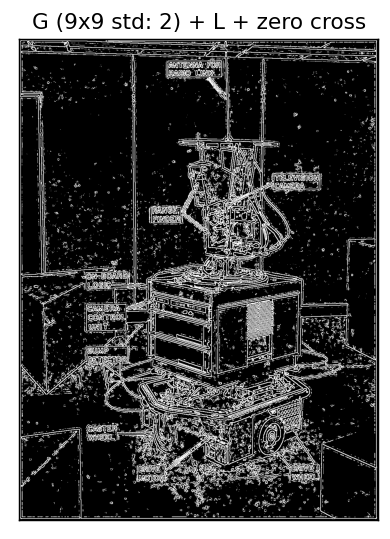

In [17]:
# Applying Gaussian + Laplacian + zero-cross

laplacian_kernel = np.array([
    [0,  1, 0],
    [1, -4, 1],
    [0,  1, 0]
])

x = 4
std_dev = 2
mean = 0

gaussian_filter = create2DFilter(std_dev, mean, x)

filter_image = scipy.signal.convolve2d(shakey, gaussian_filter)
filter_image = scipy.signal.convolve2d(filter_image, laplacian_kernel)
filter_image = zero_cross(filter_image)
show_binary_image(filter_image, f"G ({2*x+1}x{2*x+1} std: {std_dev}) + L + zero cross")

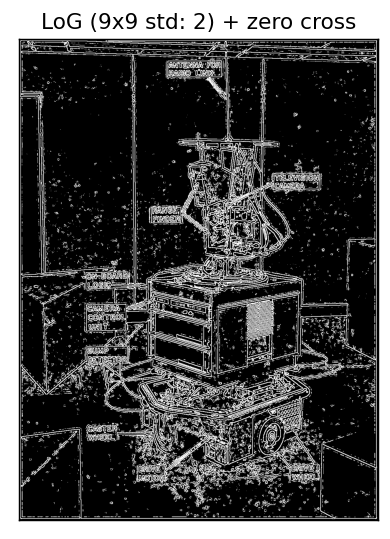

In [135]:
# Complete Task 5 here

# LoG convolving laplacian kernel with gaussian

laplacian_kernel = np.array([
    [0,  1, 0],
    [1, -4, 1],
    [0,  1, 0]
])

x = 4
std_dev = 2
mean = 0

gaussian_filter = create2DFilter(std_dev, mean, x)

LoG = scipy.signal.convolve2d(laplacian_kernel, gaussian_filter)

filter_image = scipy.signal.convolve2d(shakey, LoG)
filter_image = zero_cross(filter_image)
show_binary_image(filter_image, f"LoG ({2*x+1}x{2*x+1} std: {std_dev}) + zero cross")
